In [1]:
# %matplotlib notebook

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io
from PIL import Image, ImageDraw
from ultralytics import YOLO
import numpy as np
import torch

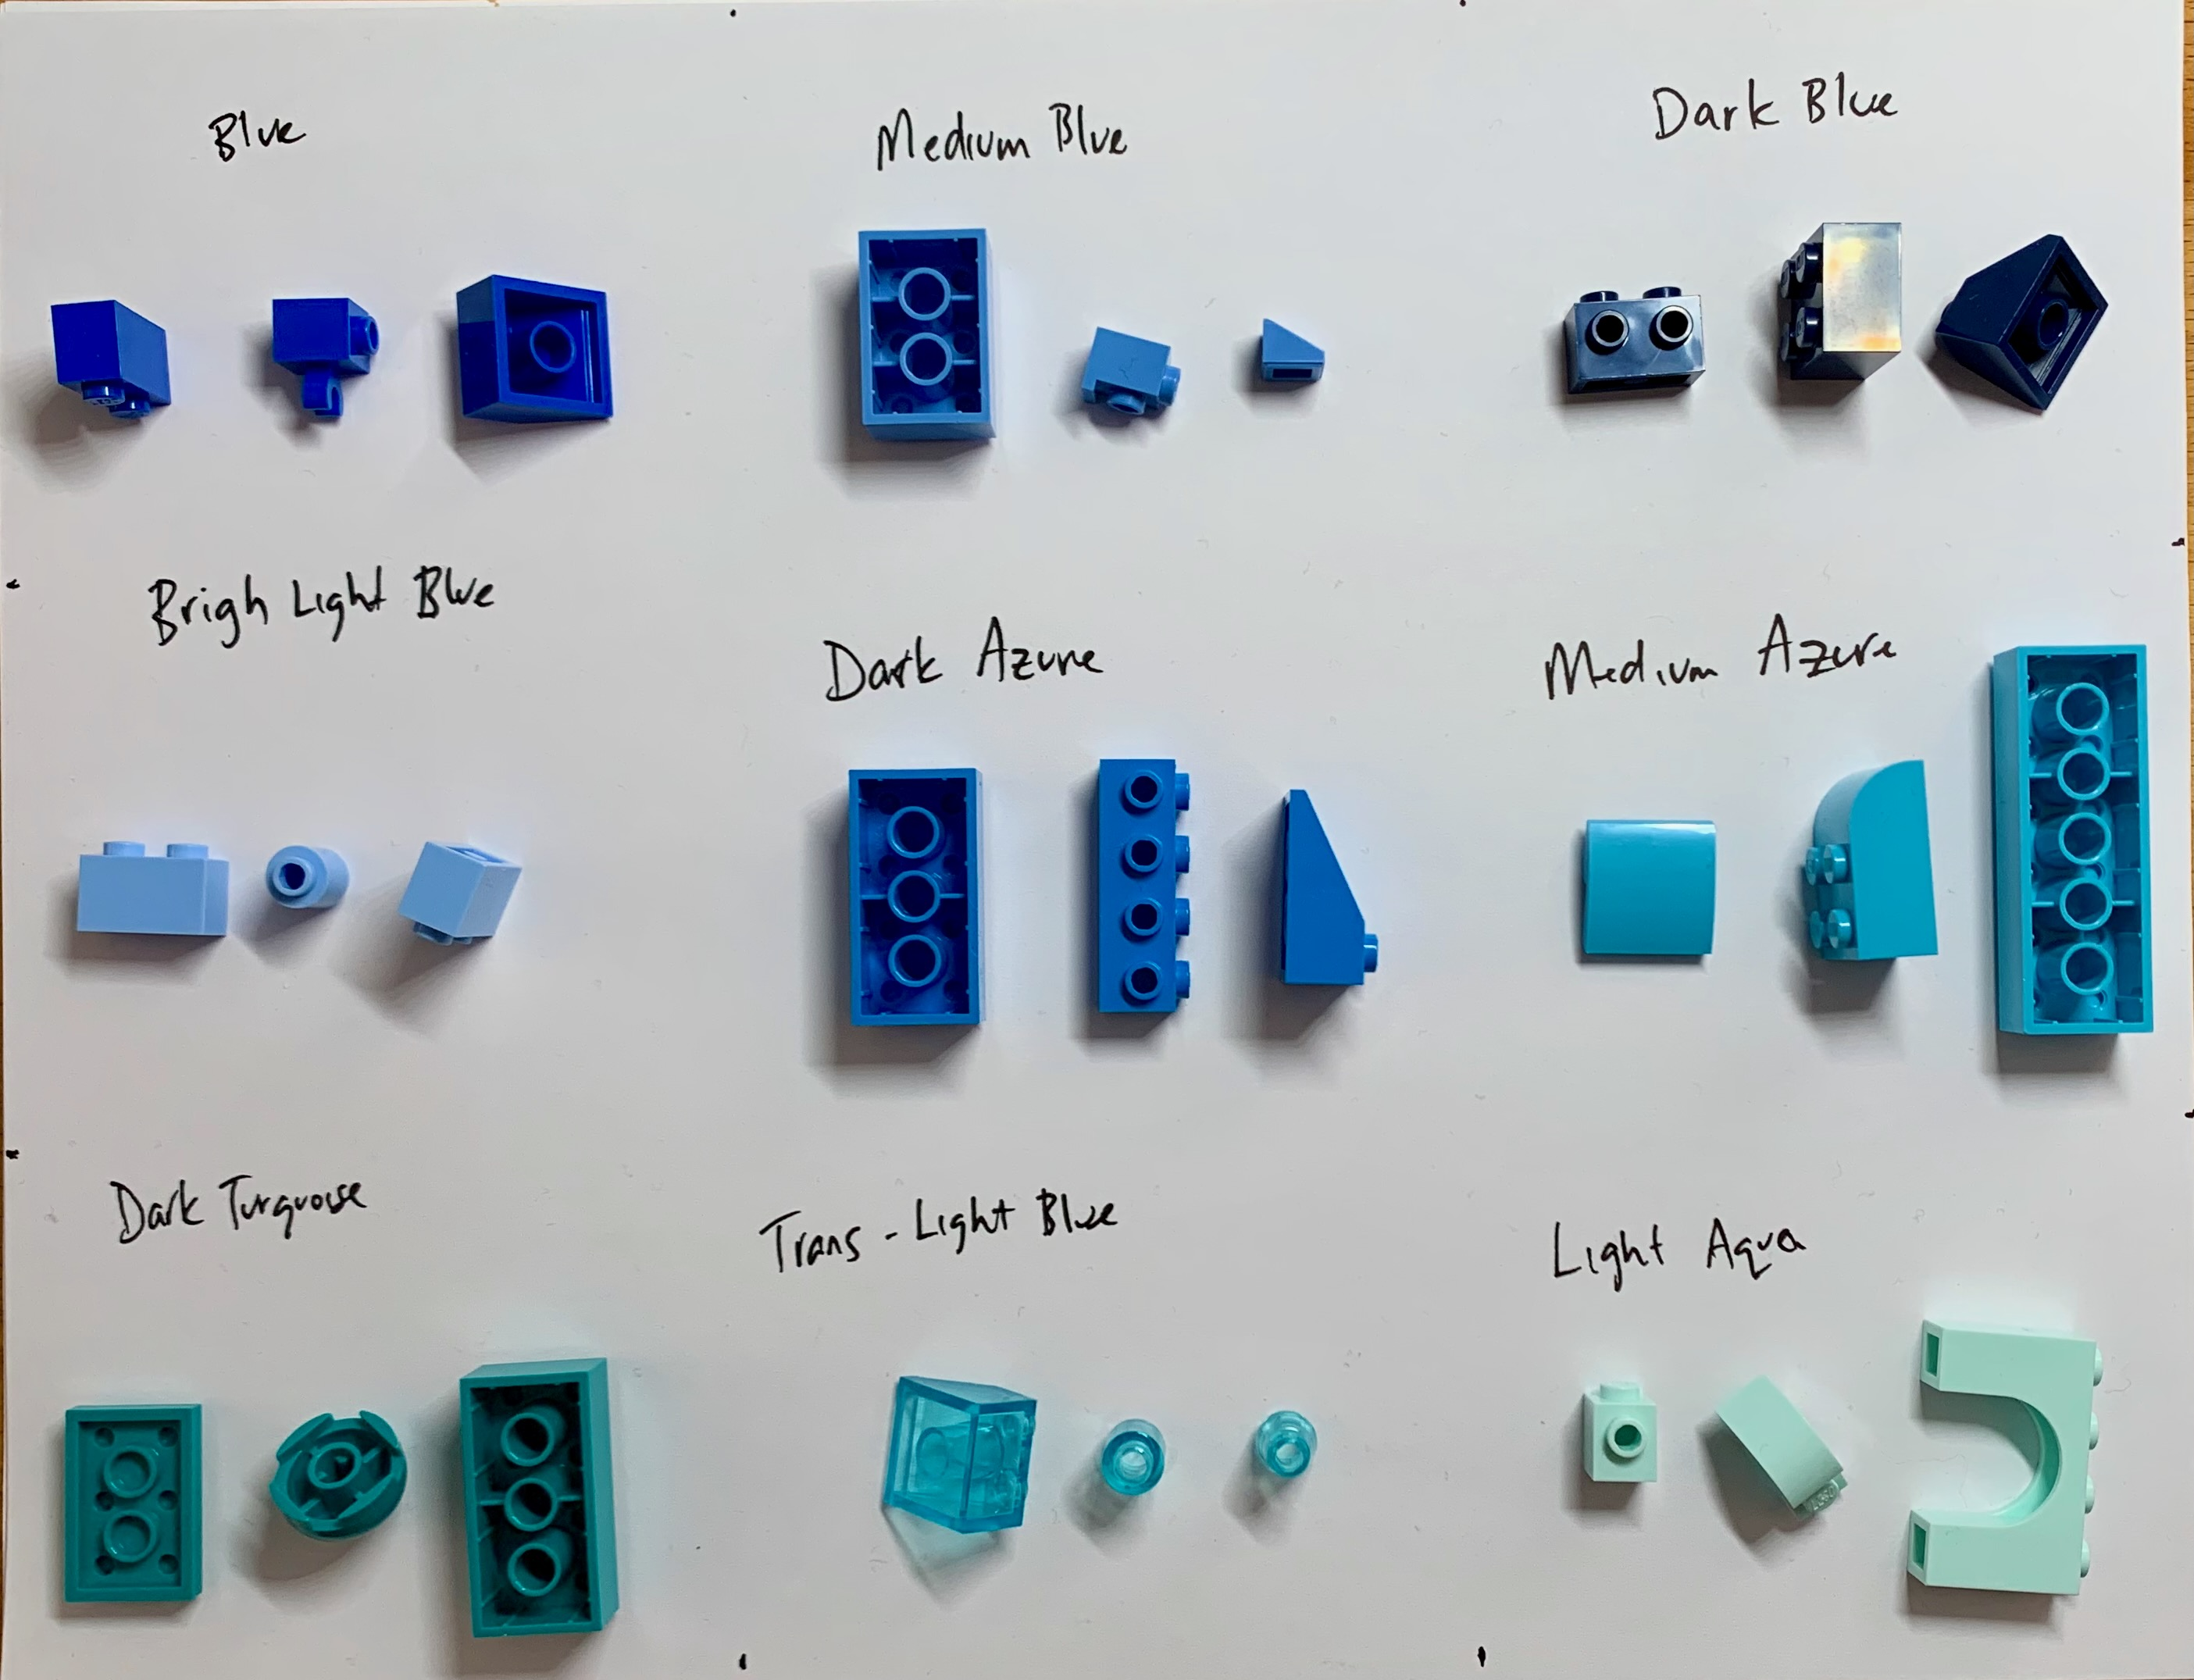

In [2]:
# Open the image
img = Image.open('./src/blues.jpeg')

img

In [6]:


# Get the width and height of the image
width, height = img.size

# Calculate the size of each grid cell
cell_width = width // 3
cell_height = height // 3

# Create a list to store the cropped images
cells = []

# Loop through each cell in the grid
for i in range(3):
    for j in range(3):
        # Define the bounding box for the cell
        left = j * cell_width
        top = i * cell_height
        right = (j + 1) * cell_width
        bottom = (i + 1) * cell_height
        
        # Crop the image to the bounding box
        cell = img.crop((left, top, right, bottom))
        
        # Add the cell to the list of cells
        cells.append(cell)

# Create a new figure
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# Loop through each cell in the grid
for i in range(3):
    for j in range(3):
        # Plot the cell in the corresponding subplot
        axs[i, j].imshow(cells[i*3+j])
        axs[i, j].axis('off')

fig.tight_layout()


In [3]:

model = YOLO("detect-10-4k-real-and-renders-nano-1024-image-size2.pt")

# Create a new figure
# fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# # Loop through each cell in the grid
# for i in range(3):
#     for j in range(3):
original = cells[0]
results = model(original.convert("RGB"))
boxes = results[0].cpu().boxes

scratch = original.copy()
draw = ImageDraw.Draw(scratch)

for box in boxes:
    x1, y1, x2, y2 = box.xyxyn[0]
    print(box.xyxy[0])
    print(x1, y1, x2, y2)
    
    draw.rectangle(((x1, y1), (x2, y2)), outline='red', width=2)
    
scratch.show()



0: 512x640 3 legos, 55.2ms
Speed: 0.7ms preprocess, 55.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


tensor([583.21478, 350.94989, 785.39008, 542.10089])
tensor(0.62309) tensor(0.48947) tensor(0.83909) tensor(0.75607)
tensor([347.78470, 380.85971, 485.78082, 479.48364])
tensor(0.37156) tensor(0.53119) tensor(0.51900) tensor(0.66874)
tensor([ 65.32413, 383.95706, 219.00227, 535.16638])
tensor(0.06979) tensor(0.53550) tensor(0.23398) tensor(0.74640)


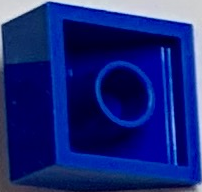

In [4]:
box = boxes[0]
x1, y1, x2, y2 = box.xyxy[0]

image = original.crop((int(x1), int(y1), int(x2), int(y2)))
image
